Заполнение дырок

In [1]:
from matplotlib import pyplot as plt

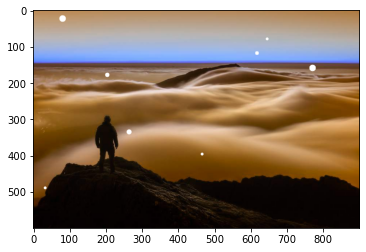

In [2]:
import cv2
import numpy as np
import random

image = cv2.imread("./data/man.jpg")

height, width, _ = image.shape

num_circles = 8

circle_centers = [(random.randint(20, width - 20), random.randint(20, height - 20)) for _ in range(num_circles)]
circle_rad = [random.randint(2, 9) for _ in range(num_circles)]

for center, radius in zip(circle_centers, circle_rad):
    cv2.circle(image, center, radius, (255, 255, 255), -1)

plt.imshow(image);



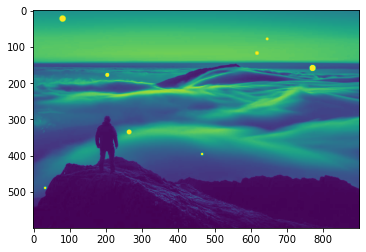

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray);

In [4]:
(thresh, im_bw) = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

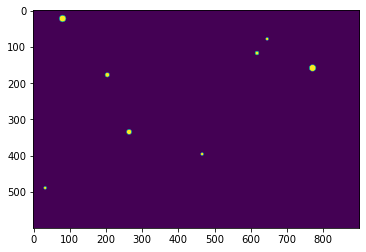

In [5]:
# Нашли маску
plt.imshow(im_bw)

In [7]:
# Свой inpaint
def inpaint(image, mask, radius, it=1):
    # Создание копии изображения для восстановления
    inpainted_image = image.copy()
    
    # Нахождение координат пикселей, требующих восстановления
    rows, cols = np.where(mask == 255)
    # it раз
    for i in range(it):
        # Проход по координатам пикселей и их восстановление
        for row, col in zip(rows, cols):
            # Извлечение окна вокруг текущего пикселя
            window = inpainted_image[row - radius:row + radius + 1, col - radius:col + radius + 1]

            # Вычисление среднего значения цвета окна
            mean_color = np.mean(window, axis=(0, 1))

            # Заполнение текущего пикселя средним значением цвета
            inpainted_image[row, col] = mean_color

    return inpainted_image

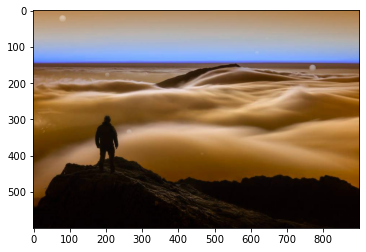

In [16]:
fixed = inpaint(image, im_bw, 10, it=1)
plt.imshow(fixed);

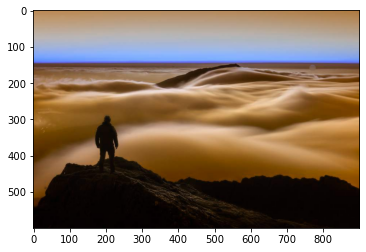

In [17]:
fixed = inpaint(image, im_bw, 10, it=3)
plt.imshow(fixed);

Считывание дорожного знака

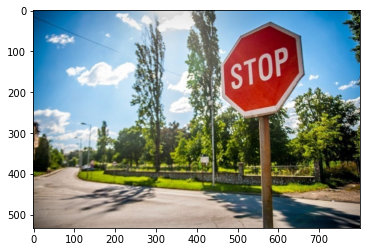

In [18]:
image = cv2.imread("./data/STOP.jpg")[:,:,::-1]
plt.imshow(image);

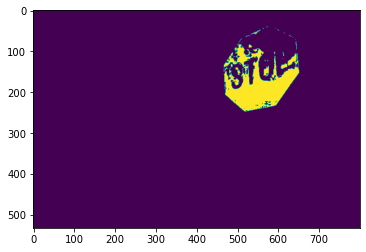

In [19]:
# Можем откинуть точки с маслыми значениями красного
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_red = np.array([0, 100, 100])
upper_red = np.array([5, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
plt.imshow(mask);

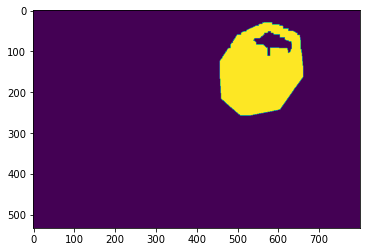

In [20]:
# Замыкаем границу
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(mask,kernel,iterations = 5)
plt.imshow(dilation);

In [21]:
# Находим контуры
(cnts, _) = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
cv2.drawContours(mask, cnts, -1, 255, thickness=cv2.FILLED);

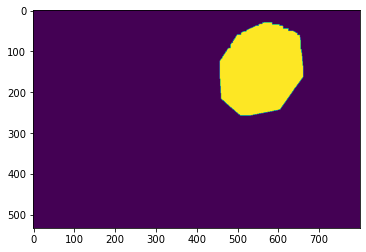

In [23]:
plt.imshow(mask)

In [24]:
# Разъедаем границу
eroded_mask = cv2.erode(mask,kernel,iterations = 3)

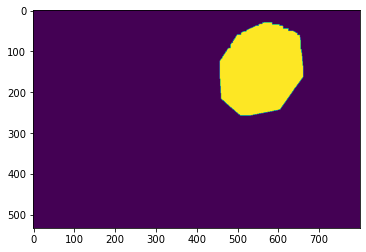

In [25]:
plt.imshow(mask)

In [26]:
result = cv2.bitwise_and(image,image, mask= eroded_mask)

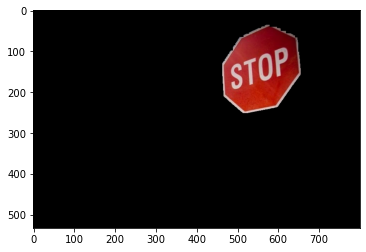

In [18]:
plt.imshow(result)

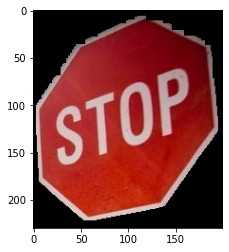

In [28]:
plt.imshow(result[30:260,460:660,:])

In [31]:
cv2.imwrite("./data/stop_segmented.jpg", result[30:260,460:660,:][:,:,::-1])

True